# Sentiment Analysis using NLTK

# Text Cleaning

In [3]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
  

# Sample tweet data
tweets = [
    "RT @username: Love the new #iPhone! 😍😍😍",
    "Just finished my workout! 💪 #fitness",
    "Can't wait for the weekend! 🎉🎉"
]

# Function to clean and preprocess text
def clean_text(text):
    # Remove mentions, hashtags, and special characters
    text = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|[^A-Za-z\s]", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Clean and preprocess each tweet
cleaned_tweets = [clean_text(tweet) for tweet in tweets]

# Display cleaned tweets
for tweet, cleaned_tweet in zip(tweets, cleaned_tweets):
    print(f"Original tweet: {tweet}")
    print(f"Cleaned tweet: {cleaned_tweet}")
    print()


Original tweet: RT @username: Love the new #iPhone! 😍😍😍
Cleaned tweet: rt love new

Original tweet: Just finished my workout! 💪 #fitness
Cleaned tweet: finished workout

Original tweet: Can't wait for the weekend! 🎉🎉
Cleaned tweet: cant wait weekend



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MANI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#  Stemming

In [21]:
from nltk.stem import PorterStemmer

# Function for stemming
def stem_text(tokens):
    # Initialize the Porter stemmer
    porter = PorterStemmer()
    # Stem each token in the list
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

# Display cleaned tweets and stemmed tokens
for tweet, cleaned_tweet in zip(tweets, cleaned_tweets):
    print(f"Original tweet: {tweet}")
    print(f"Cleaned tweet: {cleaned_tweet}")
    # Tokenization for stemmed tokens
    stemmed_tokens = word_tokenize(cleaned_tweet)
    # Stemming
    stemmed_tokens = stem_text(stemmed_tokens)
    print(f"Stemmed tokens: {stemmed_tokens}")
    print()


Original tweet: RT @username: Love the new #iPhone! 😍😍😍
Cleaned tweet: rt love new
Stemmed tokens: ['rt', 'love', 'new']

Original tweet: Just finished my workout! 💪 #fitness
Cleaned tweet: finish workout
Stemmed tokens: ['finish', 'workout']

Original tweet: Can't wait for the weekend! 🎉🎉
Cleaned tweet: cant wait weekend
Stemmed tokens: ['cant', 'wait', 'weekend']

Original tweet: Amazing weather today! ☀️
Cleaned tweet: amaz weather today
Stemmed tokens: ['amaz', 'weather', 'today']

Original tweet: Excited for the upcoming event! 🎊
Cleaned tweet: excit upcom event
Stemmed tokens: ['excit', 'upcom', 'event']

Original tweet: Watching my favorite TV show! 📺
Cleaned tweet: watch favorit tv show
Stemmed tokens: ['watch', 'favorit', 'tv', 'show']

Original tweet: Feeling grateful for all the support! ❤️
Cleaned tweet: feel grate support
Stemmed tokens: ['feel', 'grate', 'support']

Original tweet: Learning new things every day! 📚
Cleaned tweet: learn new thing everi day
Stemmed tokens: [

# Top Frequent Terms

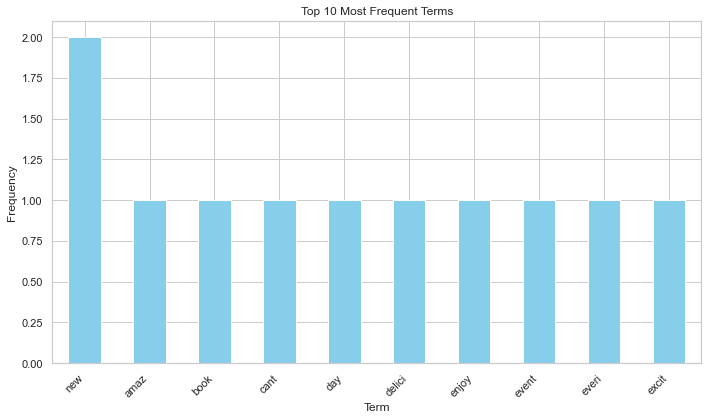

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Create term-document matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_tweets)

# Get feature names (terms)
terms = vectorizer.get_feature_names()

# Convert sparse matrix to DataFrame
df = pd.DataFrame(X.toarray(), columns=terms, index=tweets)

# Calculate total frequency of each term across all tweets
term_frequencies = df.sum(axis=0)

# Sort terms by frequency and select the top N terms
N = 10  # Number of top terms to display
top_terms = term_frequencies.nlargest(N)

# Plot top N terms
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Term Document Matrix

Document-Term Matrix:
                                            amaz  book  cant  day  delici  \
RT @username: Love the new #iPhone! 😍😍😍        0     0     0    0       0   
Just finished my workout! 💪 #fitness           0     0     0    0       0   
Can't wait for the weekend! 🎉🎉                 0     0     1    0       0   
Amazing weather today! ☀️                      1     0     0    0       0   
Excited for the upcoming event! 🎊              0     0     0    0       0   
Watching my favorite TV show! 📺                0     0     0    0       0   
Feeling grateful for all the support! ❤️       0     0     0    0       0   
Learning new things every day! 📚               0     0     0    1       0   
Enjoying a delicious meal with friends! 🍽️     0     0     0    0       1   
Relaxing at home with a good book! 📖           0     1     0    0       0   

                                            enjoy  event  everi  excit  \
RT @username: Love the new #iPhone! 😍😍😍         0      0

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hinaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hinaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\hinaa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


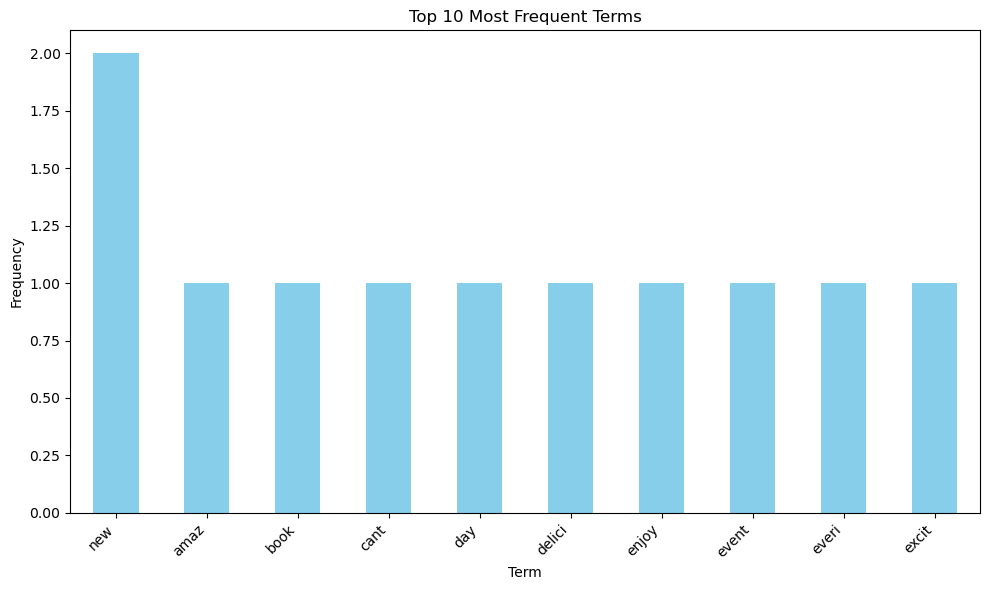

In [24]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')

# Sample tweet data
tweets = [
    "RT @username: Love the new #iPhone! 😍😍😍",
    "Just finished my workout! 💪 #fitness",
    "Can't wait for the weekend! 🎉🎉",
    "Amazing weather today! ☀️",
    "Excited for the upcoming event! 🎊",
    "Watching my favorite TV show! 📺",
    "Feeling grateful for all the support! ❤️",
    "Learning new things every day! 📚",
    "Enjoying a delicious meal with friends! 🍽️",
    "Relaxing at home with a good book! 📖"
]

# Function to clean and preprocess text
def clean_text(text):
    # Remove mentions, hashtags, and special characters
    text = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|[^A-Za-z\s]", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Stemming
    stemmed_tokens = stem_text(tokens)
    # Join tokens back into a string
    clean_text = ' '.join(stemmed_tokens)
    return clean_text

# Function for stemming
def stem_text(tokens):
    # Initialize the Porter stemmer
    porter = PorterStemmer()
    # Stem each token in the list
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

# Clean and preprocess each tweet
cleaned_tweets = [clean_text(tweet) for tweet in tweets]

# Create term-document matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_tweets)

# Get feature names (terms)
terms = vectorizer.get_feature_names()

# Convert sparse matrix to DataFrame
df = pd.DataFrame(X.toarray(), columns=terms, index=tweets)

# Display the document-term matrix
print("Document-Term Matrix:")
print(df)
print()

# Calculate total frequency of each term across all tweets
term_frequencies = df.sum(axis=0)

# Sort terms by frequency and select the top N terms
N = 10  # Number of top terms to display
top_terms = term_frequencies.nlargest(N)

# Plot top N terms
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Task - Create Word Cloud for the given data

# Task - Show associations for word 'new'

# Sentiment Analysis

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Sample tweet data
tweets = [
    "RT @username: Love the new #iPhone! 😍😍😍",
    "Just finished my workout! 💪 #fitness",
    "Can't wait for the weekend! 🎉🎉",
    "Amazing weather today! ☀️",
    "Excited for the upcoming event! 🎊",
    "Watching my favorite TV show! 📺",
    "Feeling grateful for all the support! ❤️",
    "Learning new things every day! 📚",
    "Enjoying a delicious meal with friends! 🍽️",
    "Relaxing at home with a good book! 📖"
]

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each tweet
sentiments = []
for tweet in tweets:
    sentiment_score = sia.polarity_scores(tweet)
    sentiments.append(sentiment_score)

# Print sentiment scores for each tweet
for i, sentiment in enumerate(sentiments, 1):
    print(f"Tweet {i}: {sentiment}")


Tweet 1: {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.6696}
Tweet 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 4: {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6239}
Tweet 5: {'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.4003}
Tweet 6: {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.5093}
Tweet 7: {'neg': 0.0, 'neu': 0.348, 'pos': 0.652, 'compound': 0.7574}
Tweet 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 9: {'neg': 0.0, 'neu': 0.222, 'pos': 0.778, 'compound': 0.8883}
Tweet 10: {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.75}


# Sentiment Analysis Visualization

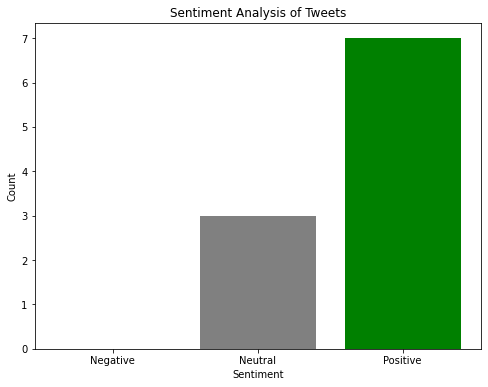

In [13]:
import matplotlib.pyplot as plt

# Extract compound sentiment scores from the sentiments list
compound_scores = [sentiment['compound'] for sentiment in sentiments]

# Define labels for the sentiment categories
labels = ['Negative', 'Neutral', 'Positive']

# Categorize the compound sentiment scores into negative, neutral, and positive
sentiment_categories = ['Negative' if score < 0 else 'Neutral' if score == 0 else 'Positive' for score in compound_scores]

# Count the occurrences of each sentiment category
sentiment_counts = {label: sentiment_categories.count(label) for label in labels}

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Tweets')
plt.show()


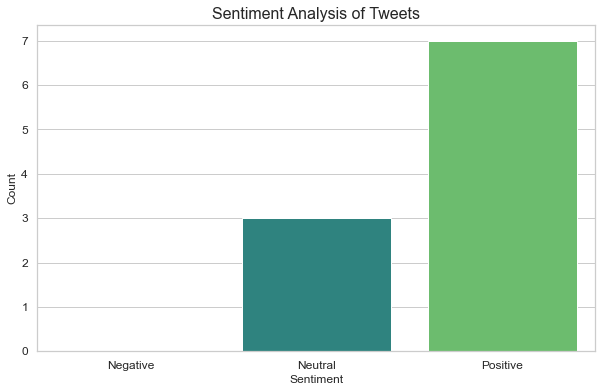

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract compound sentiment scores from the sentiments list
compound_scores = [sentiment['compound'] for sentiment in sentiments]

# Define labels for the sentiment categories
labels = ['Negative', 'Neutral', 'Positive']

# Categorize the compound sentiment scores into negative, neutral, and positive
sentiment_categories = ['Negative' if score < 0 else 'Neutral' if score == 0 else 'Positive' for score in compound_scores]

# Count the occurrences of each sentiment category
sentiment_counts = {label: sentiment_categories.count(label) for label in labels}

# Set seaborn style
sns.set(style="whitegrid")

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette="viridis")
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment Analysis of Tweets', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Distribution of Tweets Lenth 

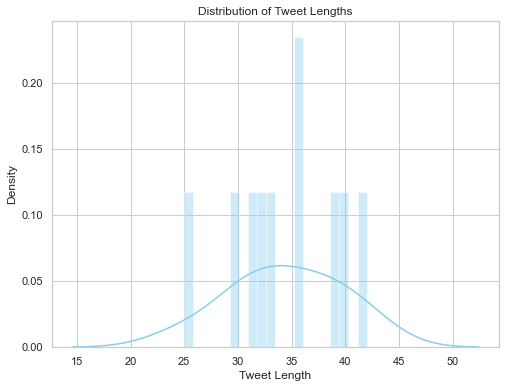

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Tweet Lengths
tweet_lengths = [len(tweet) for tweet in tweets]
plt.figure(figsize=(8, 6))
sns.distplot(tweet_lengths, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.show()


# Distribution of Words

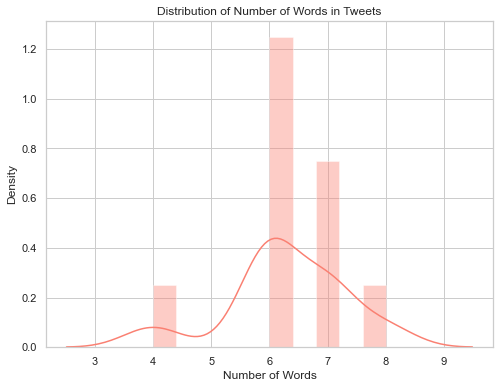

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Number of Words
num_words = [len(tweet.split()) for tweet in tweets]
plt.figure(figsize=(8, 6))
sns.distplot(num_words, bins=10, kde=True, color='salmon')
plt.title('Distribution of Number of Words in Tweets')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.show()


# Task : Visualize Top N HashTags

# Task : Use TextBlob for Sentiment Analysis

# Task: Perform all the above given operations on Twitter Dataset(Download from Kaggle)

In [35]:
import re  # Import the regular expression module
from nltk.tokenize import word_tokenize  # Commenting out the import statement
from nltk.corpus import stopwords  # Commenting out the import statement
import string  # Import the string module
import nltk  # Import the Natural Language Toolkit (nltk) library
import pandas as pd
import numpy as np

nltk.download('punkt')  # Download the Punkt tokenizer models
nltk.download('stopwords')  # Download the stopwords corpus
# . comment these code  # This line seems to be a comment


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hinaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hinaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Task : Repeat the above task with a different dataset

In [67]:
df=pd.read_csv("C:\\Users\\hinaa\\Downloads\\twitter.csv")
df

,Tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
...,...
95,Strider is a sick little puppy http://apps.fa...
96,"so rylee,grace...wana go steve's party or not?..."
97,"hey, I actually won one of my bracket pools! T..."
98,"@stark YOU don't follow me, either and i work..."


# Clean-Text

In [68]:
# Function to clean and preprocess text
def clean_text(text):
    # Remove mentions, hashtags, and special characters
    text = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|[^A-Za-z\s]", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Apply the clean_text function to the 'tweet_column' in your DataFrame
cleaned_tweet = df['Tweets'].apply(clean_text)

# Display the cleaned tweets
for original_tweet, cleaned_tweet in zip(df['Tweets'], cleaned_tweet):
    print(f"Original tweet: {original_tweet}")
    print(f"Cleaned tweet: {cleaned_tweet}")
    print()


Original tweet: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Cleaned tweet: httptwitpiccomyzl awww thats bummer shoulda got david carr third day

Original tweet: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Cleaned tweet: upset cant update facebook texting might cry result school today also blah

Original tweet: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
Cleaned tweet: dived many times ball managed save rest go bounds

Original tweet: my whole body feels itchy and like its on fire 
Cleaned tweet: whole body feels itchy like fire

Original tweet: @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
Cleaned tweet: behaving im mad cant see

Original tweet: @Kwesidei not the whole crew 
Cleaned tweet: whole crew

Original tweet: Need a hug 
Cleaned t

# Stemming

In [69]:
def stem_text(tokens):
    # Initialize the Porter stemmer
    porter = PorterStemmer()
    # Stem each token in the list
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

# Apply the clean_text function to the 'Tweets' column in your DataFrame
cleaned_tweets = df['Tweets'].apply(clean_text)

# Apply the stem_text function to the 'cleaned_tweets' column in your DataFrame
stemmed_tokens = cleaned_tweets.apply(lambda x: stem_text(word_tokenize(x)))

# Display the cleaned tweets and stemmed tokens
for tweet, cleaned_tweet, stemmed_tokens in zip(df['Tweets'], cleaned_tweets, stemmed_tokens):
    print(f"Original tweet: {tweet}")
    print(f"Cleaned tweet: {cleaned_tweet}")
    print(f"Stemmed tokens: {stemmed_tokens}")
    print()

Original tweet: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Cleaned tweet: httptwitpiccomyzl awww thats bummer shoulda got david carr third day
Stemmed tokens: ['httptwitpiccomyzl', 'awww', 'that', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']

Original tweet: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Cleaned tweet: upset cant update facebook texting might cry result school today also blah
Stemmed tokens: ['upset', 'cant', 'updat', 'facebook', 'text', 'might', 'cri', 'result', 'school', 'today', 'also', 'blah']

Original tweet: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
Cleaned tweet: dived many times ball managed save rest go bounds
Stemmed tokens: ['dive', 'mani', 'time', 'ball', 'manag', 'save', 'rest', 'go', 'bound']

Original tweet: my whole body feels itchy and like its on fire 


Document-Term Matrix:
    able  account  actually  added  adidas  afternoon  ago  agreed  ahh  aim  \
0      0        0         0      0       0          0    0       0    0    0   
1      0        0         0      0       0          0    0       0    0    0   
2      0        0         0      0       0          0    0       0    0    0   
3      0        0         0      0       0          0    0       0    0    0   
4      0        0         0      0       0          0    0       0    0    0   
..   ...      ...       ...    ...     ...        ...  ...     ...  ...  ...   
95     0        0         0      0       0          0    0       0    0    0   
96     1        0         0      0       0          0    0       0    0    0   
97     0        0         1      0       0          0    0       0    0    0   
98     0        0         0      0       0          0    0       0    0    0   
99     0        0         0      0       0          0    0       0    0    0   

    ...  wutcha  

C:\Users\hinaa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


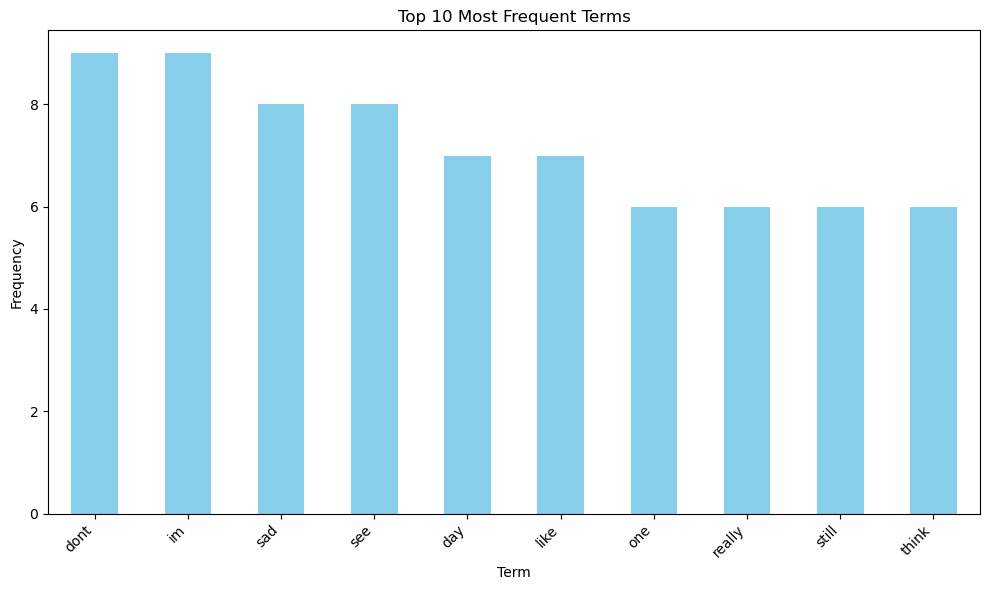

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Create term-document matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_tweets) # Using 'cleaned_tweets' column from your DataFrame

# Get feature names (terms)
terms = vectorizer.get_feature_names()

# Convert sparse matrix to DataFrame
df_term_matrix = pd.DataFrame(X.toarray(), columns=terms, index=df.index)  # Using the index of the original DataFrame

# Print document-term matrix
print("Document-Term Matrix:")
print(df_term_matrix)
print()

# Calculate total frequency of each term across all tweets
term_frequencies = df_term_matrix.sum(axis=0)

# Sort terms by frequency and select the top N terms
N = 10  # Number of top terms to display
top_terms = term_frequencies.nlargest(N)

# Plot top N terms
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Create Word Cloud for the given data

In [71]:
!pip install wordcloud

0     @switchfoot http://twitpic.com/2y1zl - Awww, t...
1     is upset that he can't update his Facebook by ...
2     @Kenichan I dived many times for the ball. Man...
3       my whole body feels itchy and like its on fire 
4     @nationwideclass no, it's not behaving at all....
                            ...                        
95    Strider is a sick little puppy  http://apps.fa...
96    so rylee,grace...wana go steve's party or not?...
97    hey, I actually won one of my bracket pools! T...
98    @stark YOU don't follow me, either  and i work...
99    A bad nite for the favorite teams: Astros and ...
Name: Tweets, Length: 100, dtype: object


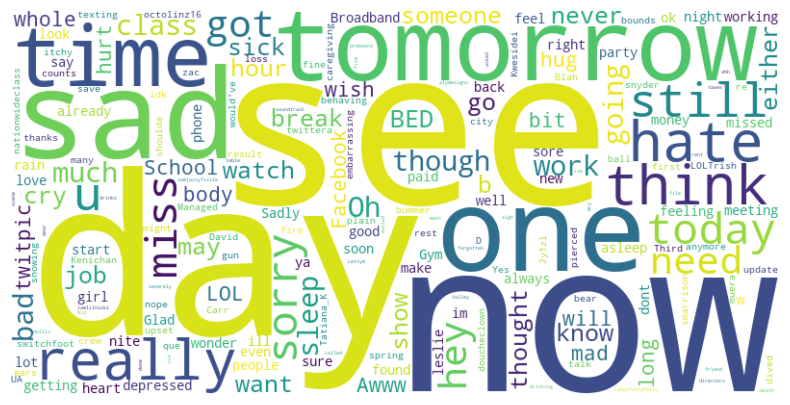

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all tweets into a single string
text = ' '.join(df['Tweets'])
print(df['Tweets'])
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Show associations for word 'class'

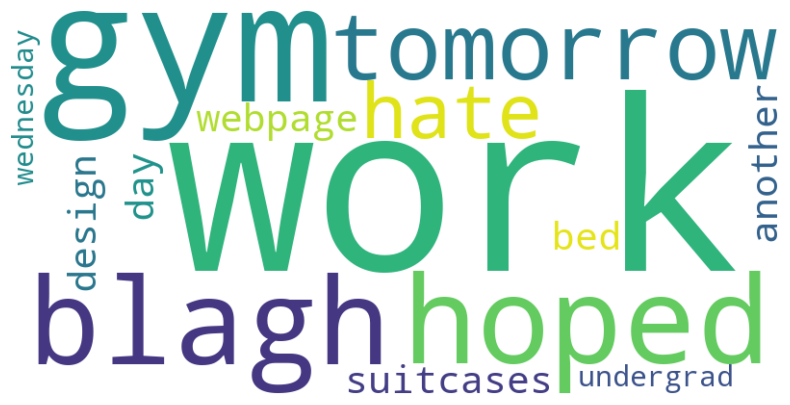

In [73]:
text = df['Tweets'].str.cat(sep=' ')

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]

# Calculate word frequencies
word_freq = Counter(tokens)

# Calculate co-occurrences with 'now'
context_window = 2
now_associations = Counter()
for i, word in enumerate(tokens):
    if word == 'class':
        start_index = max(0, i - context_window)
        end_index = min(len(tokens), i + context_window + 1)
        context = tokens[start_index:end_index]
        now_associations.update(context)

# Remove 'now' from associations
del now_associations['class']

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(now_associations)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis Visualization

In [74]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each tweet
sentiments = []
for tweet in df['Tweets']:
    sentiment_score = sia.polarity_scores(tweet)
    sentiments.append(sentiment_score)

# Print sentiment scores for each tweet
for i, sentiment in enumerate(sentiments, 1):
    print(f"Tweet {i}: {sentiment}")


Tweet 1: {'neg': 0.129, 'neu': 0.745, 'pos': 0.126, 'compound': -0.0173}
Tweet 2: {'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.75}
Tweet 3: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4939}
Tweet 4: {'neg': 0.321, 'neu': 0.5, 'pos': 0.179, 'compound': -0.25}
Tweet 5: {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.6597}
Tweet 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 7: {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767}
Tweet 8: {'neg': 0.093, 'neu': 0.548, 'pos': 0.359, 'compound': 0.745}
Tweet 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 13: {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.5994}
Tweet 14: {'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'compound': -0.1027}
Tweet 15: {'neg': 0.0, 'neu': 0.855, 'pos': 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hinaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Sentiment Analysis Visualization

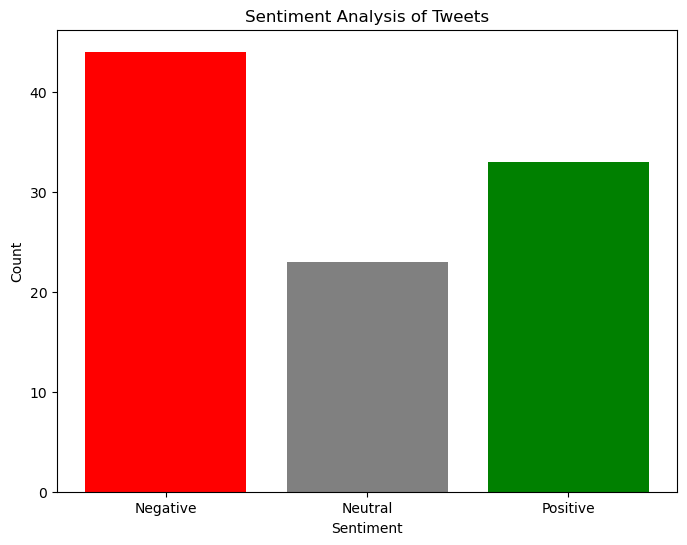

In [75]:
import matplotlib.pyplot as plt

# Extract compound sentiment scores from the sentiments list
compound_scores = [sentiment['compound'] for sentiment in sentiments]

# Define labels for the sentiment categories
labels = ['Negative', 'Neutral', 'Positive']

# Categorize the compound sentiment scores into negative, neutral, and positive
sentiment_categories = ['Negative' if score < 0 else 'Neutral' if score == 0 else 'Positive' for score in compound_scores]

# Count the occurrences of each sentiment category
sentiment_counts = {label: sentiment_categories.count(label) for label in labels}

# Sort the sentiment categories by their labels
sorted_sentiment_counts = {label: sentiment_counts[label] for label in labels}

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sorted_sentiment_counts.keys(), sorted_sentiment_counts.values(), color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Tweets')
plt.show()


# Distribution of Tweets Lenth

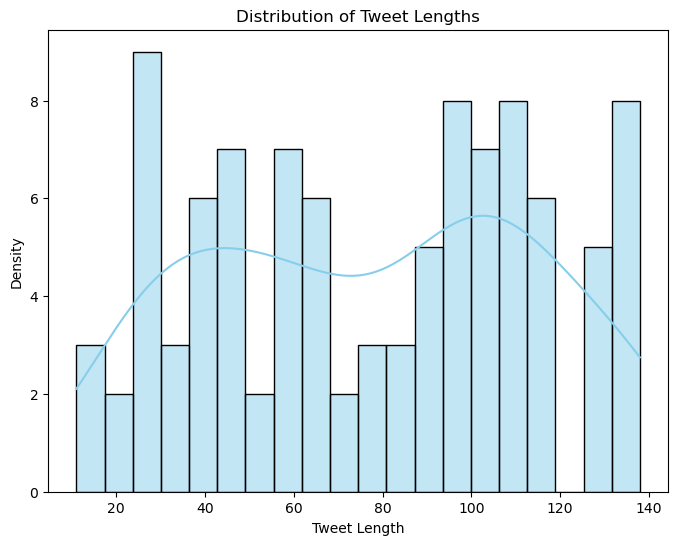

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract tweet lengths from the 'Tweets' column
tweet_lengths = [len(tweet) for tweet in df['Tweets']]

# Plot the distribution of tweet lengths
plt.figure(figsize=(8, 6))
sns.histplot(tweet_lengths, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.show()


# Distribution of Words

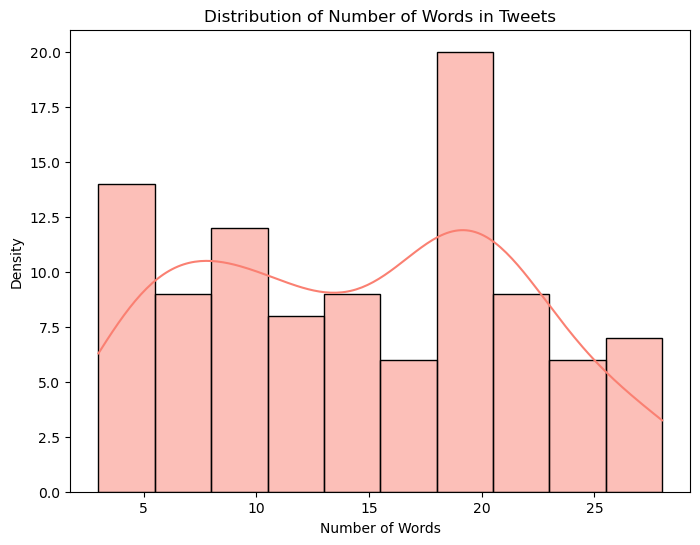

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the number of words from each tweet in the 'Tweets' column
num_words = [len(tweet.split()) for tweet in df['Tweets']]

# Plot the distribution of the number of words
plt.figure(figsize=(8, 6))
sns.histplot(num_words, bins=10, kde=True, color='salmon')
plt.title('Distribution of Number of Words in Tweets')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.show()


# Visualize Top N HashTag

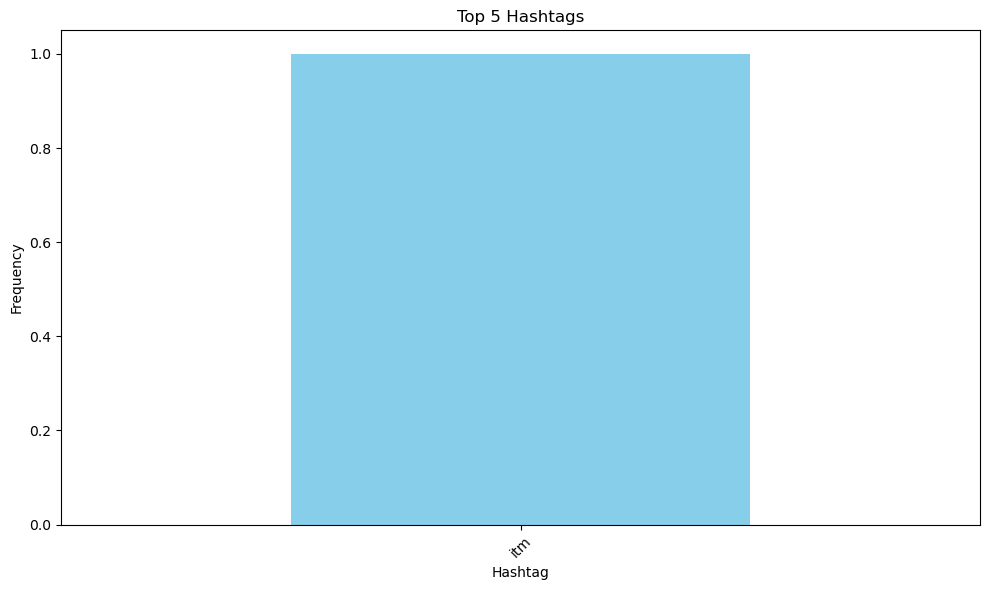

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with one column 'Tweets'
# Replace this with your actual DataFrame containing tweet data



# Extract hashtags from tweets
hashtags = df['Tweets'].str.findall(r'#(\w+)').explode()

# Count occurrences of each hashtag
top_n = 5  # Define the number of top hashtags to visualize
top_hashtags = hashtags.value_counts().nlargest(top_n)

# Plot the top N hashtags
plt.figure(figsize=(10, 6))
top_hashtags.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Use TextBlob for Sentiment Analysis

In [79]:
!pip install textblob
from textblob import TextBlob



# Perform sentiment analysis for each tweet
sentiments = []
for tweet in df['Tweets']:
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append(sentiment)

# Add the sentiment column to the DataFrame
df['Sentiment'] = sentiments

# Display the DataFrame with sentiment analysis results
print(df)


                                               Tweets Sentiment
0   @switchfoot http://twitpic.com/2y1zl - Awww, t...  Positive
1   is upset that he can't update his Facebook by ...   Neutral
2   @Kenichan I dived many times for the ball. Man...  Positive
3     my whole body feels itchy and like its on fire   Positive
4   @nationwideclass no, it's not behaving at all....  Negative
..                                                ...       ...
95  Strider is a sick little puppy  http://apps.fa...  Negative
96  so rylee,grace...wana go steve's party or not?...  Positive
97  hey, I actually won one of my bracket pools! T...  Negative
98  @stark YOU don't follow me, either  and i work...  Negative
99  A bad nite for the favorite teams: Astros and ...  Positive

[100 rows x 2 columns]
